In [1]:
import numpy as np
import pandas as pd

In [2]:
data_raw = pd.read_parquet("datasets/result-1681901450873.parquet.gzip")

drop_columns = ["ebs_Q_Charge", "ebs_Q_Discharge", "BCM_ebs_I_BATT", "dcdc_OverTemperature","IC_LowBatteryvoltage", "DCDC_realInputVoltage", "DCDC_realInputCurrent"]
data_raw = data_raw.drop(columns=drop_columns)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594337 entries, 0 to 1594336
Data columns (total 32 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   vin                       1594337 non-null  object 
 1   collect_ts                1594337 non-null  int64  
 2   uuid                      1594337 non-null  object 
 3   model_name                1594337 non-null  object 
 4   series_code               1594337 non-null  object 
 5   msg_create_time           1594337 non-null  object 
 6   vcu_VehicleMode           1593107 non-null  float32
 7   vcu_vehicleSpeed          1593106 non-null  float32
 8   VCU_VehicleSpeedValid     1593106 non-null  float32
 9   vcu_state                 1594033 non-null  float32
 10  bms_SOC                   1592904 non-null  float32
 11  bms_state                 1594337 non-null  float32
 12  BCM_ebs_U_BATT            185600 non-null   float32
 13  BCM_ebs_SOC               1

In [3]:
data_raw.head(20)

,vin,collect_ts,uuid,model_name,series_code,msg_create_time,vcu_VehicleMode,vcu_vehicleSpeed,VCU_VehicleSpeedValid,vcu_state,...,DCDC_MaxPwrTime,vcu_dcdc_enable,vcu_dcdc_voltageReq,DCDC_MCU_HVIL_Warning,DCDC_BMS_HVIL_Warning,DCDC_HV_InterlockStatus1,DCDC_HV_InterlockStatus,dcdc_systemStatus,dcdc_deratingStatus,dcdc_realTemperature
0,LM8F7D895MAS00538,1681701994656,LM8F7D895MAS00538#1681702004286#8608,B24DRF6EP2L01,SERES-X1,1681702003676,1.0,55.349998,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,49.0
1,LM8F7D895MAS00538,1681701995656,LM8F7D895MAS00538#1681702004286#8608,B24DRF6EP2L01,SERES-X1,1681702003676,1.0,55.518749,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,49.0
2,LM8F7D895MAS00538,1681701996656,LM8F7D895MAS00538#1681702004286#8608,B24DRF6EP2L01,SERES-X1,1681702003676,1.0,55.575001,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,49.0
3,LM8F7D895MAS00538,1681701997656,LM8F7D895MAS00538#1681702004286#8608,B24DRF6EP2L01,SERES-X1,1681702003676,1.0,55.912498,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,49.0
4,LM8F7D895MAS00538,1681701998656,LM8F7D895MAS00538#1681702004286#8608,B24DRF6EP2L01,SERES-X1,1681702003676,1.0,56.362499,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,49.0
5,LM8F7D895MAS00538,1681701999656,LM8F7D895MAS00538#1681702004286#8608,B24DRF6EP2L01,SERES-X1,1681702003676,1.0,56.924999,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,49.0
6,LM8F7D895MAS00538,1681702000656,LM8F7D895MAS00538#1681702004286#8608,B24DRF6EP2L01,SERES-X1,1681702003676,1.0,57.768749,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,49.0
7,LM8F7D895MAS00538,1681702001656,LM8F7D895MAS00538#1681702004286#8608,B24DRF6EP2L01,SERES-X1,1681702003676,1.0,59.456249,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,49.0
8,LM8F7D895MAS00538,1681702002656,LM8F7D895MAS00538#1681702004286#8608,B24DRF6EP2L01,SERES-X1,1681702003676,1.0,60.693748,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,49.0
9,LM8F7D895MAS00538,1681702003656,LM8F7D895MAS00538#1681702004286#8608,B24DRF6EP2L01,SERES-X1,1681702003676,1.0,61.875000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,49.0


In [4]:
# 填充操作
MAS00198 = data_raw[data_raw.vin == "LM8F7D897MAS00198"].fillna(method='ffill').sort_values(by="collect_ts")
MAS00198.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 573421 to 353747
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vin                       202 non-null    object 
 1   collect_ts                202 non-null    int64  
 2   uuid                      202 non-null    object 
 3   model_name                202 non-null    object 
 4   series_code               202 non-null    object 
 5   msg_create_time           202 non-null    object 
 6   vcu_VehicleMode           202 non-null    float32
 7   vcu_vehicleSpeed          202 non-null    float32
 8   VCU_VehicleSpeedValid     202 non-null    float32
 9   vcu_state                 202 non-null    float32
 10  bms_SOC                   202 non-null    float32
 11  bms_state                 202 non-null    float32
 12  BCM_ebs_U_BATT            202 non-null    float32
 13  BCM_ebs_SOC               202 non-null    float32
 14  BCM_ebs

In [5]:
MAS00198 = MAS00198[MAS00198["BCM_ebs_U_BATT"] > 7.]
MAS00198.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 573421 to 353747
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vin                       202 non-null    object 
 1   collect_ts                202 non-null    int64  
 2   uuid                      202 non-null    object 
 3   model_name                202 non-null    object 
 4   series_code               202 non-null    object 
 5   msg_create_time           202 non-null    object 
 6   vcu_VehicleMode           202 non-null    float32
 7   vcu_vehicleSpeed          202 non-null    float32
 8   VCU_VehicleSpeedValid     202 non-null    float32
 9   vcu_state                 202 non-null    float32
 10  bms_SOC                   202 non-null    float32
 11  bms_state                 202 non-null    float32
 12  BCM_ebs_U_BATT            202 non-null    float32
 13  BCM_ebs_SOC               202 non-null    float32
 14  BCM_ebs

In [6]:
pd.DataFrame(MAS00198["BCM_ebs_U_BATT"].value_counts()).sort_values(by='BCM_ebs_U_BATT')


,count
BCM_ebs_U_BATT,
7.070312,1
7.245117,1
7.571289,1
7.754883,1
7.928711,1
...,...
12.505859,1
12.519531,1
12.574219,6


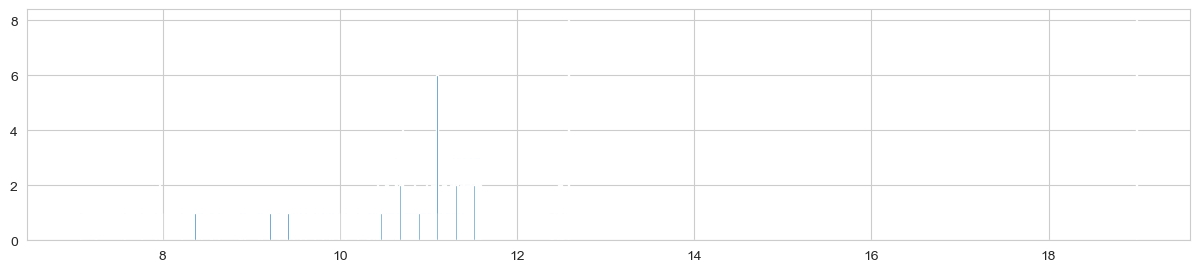

In [7]:
import matplotlib.pyplot as plt
MAS00198.BCM_ebs_U_BATT.hist(bins=1000, figsize=(15,3))
plt.show()

In [8]:
MAS00198_copy = MAS00198.copy()

MAS00198_copy['date'] = pd.to_datetime(MAS00198_copy["collect_ts"], unit='ms')

MAS00198_copy = MAS00198_copy.set_index("date")
MAS00198_copy

,vin,collect_ts,uuid,model_name,series_code,msg_create_time,vcu_VehicleMode,vcu_vehicleSpeed,VCU_VehicleSpeedValid,vcu_state,...,DCDC_MaxPwrTime,vcu_dcdc_enable,vcu_dcdc_voltageReq,DCDC_MCU_HVIL_Warning,DCDC_BMS_HVIL_Warning,DCDC_HV_InterlockStatus1,DCDC_HV_InterlockStatus,dcdc_systemStatus,dcdc_deratingStatus,dcdc_realTemperature
date,,,,,,,,,,,,,,,,,,,,,
2023-04-18 02:33:19.721,LM8F7D897MAS00198,1681785199721,LM8F7D897MAS00198#1681785200349#4853,B24DRF8JP2L01,SERES-X1,1681785199821,1.0,0.0,0.0,1.0,...,4095.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-40.0
2023-04-18 02:33:29.721,LM8F7D897MAS00198,1681785209721,LM8F7D897MAS00198#1681785210459#2521,B24DRF8JP2L01,SERES-X1,1681785209881,1.0,0.0,0.0,1.0,...,4095.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-40.0
2023-04-18 02:33:39.721,LM8F7D897MAS00198,1681785219721,LM8F7D897MAS00198#1681785220370#2295,B24DRF8JP2L01,SERES-X1,1681785219782,1.0,0.0,0.0,1.0,...,4095.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-40.0
2023-04-18 02:33:49.721,LM8F7D897MAS00198,1681785229721,LM8F7D897MAS00198#1681785230322#1195,B24DRF8JP2L01,SERES-X1,1681785229781,1.0,0.0,0.0,1.0,...,4095.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-40.0
2023-04-18 02:33:59.721,LM8F7D897MAS00198,1681785239721,LM8F7D897MAS00198#1681785240386#2988,B24DRF8JP2L01,SERES-X1,1681785239782,1.0,0.0,0.0,1.0,...,4095.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-19 09:37:52.239,LM8F7D897MAS00198,1681897072239,LM8F7D897MAS00198#1681897074052#5933,B24DRF8JP2L01,SERES-X1,1681897073489,1.0,0.0,0.0,1.0,...,4095.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-40.0
2023-04-19 09:38:02.239,LM8F7D897MAS00198,1681897082239,LM8F7D897MAS00198#1681897084061#5031,B24DRF8JP2L01,SERES-X1,1681897083490,1.0,0.0,0.0,1.0,...,4095.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-40.0
2023-04-19 09:38:12.239,LM8F7D897MAS00198,1681897092239,LM8F7D897MAS00198#1681897094068#6500,B24DRF8JP2L01,SERES-X1,1681897093481,1.0,0.0,0.0,1.0,...,4095.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-40.0


In [9]:
MAS00198_copy["2023-04-18 02:55:00":"2023-04-18 03:01:00"].loc[:, ["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]]

,BCM_ebs_U_BATT,dcdc_realOutputVoltage
date,,
2023-04-18 02:55:09.721,10.540039,0.0
2023-04-18 02:55:19.721,10.542969,0.0
2023-04-18 02:55:29.721,10.523438,0.0
2023-04-18 02:55:39.721,10.508789,0.0
2023-04-18 02:55:49.721,10.486328,0.0
2023-04-18 02:55:59.721,10.459961,0.0
2023-04-18 02:56:09.721,10.422852,0.0
2023-04-18 02:56:19.721,10.377930,0.0
2023-04-18 02:56:29.721,10.335938,0.0


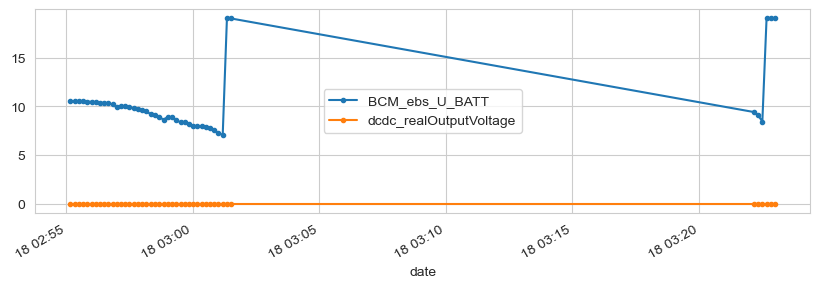

In [17]:
import matplotlib.pyplot as plt

MAS00198_copy["2023-04-18 02:55:00":"2023-04-18 04:01:00"][["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(10, 3))

# extra code – saves the figure for the book
plt.show()

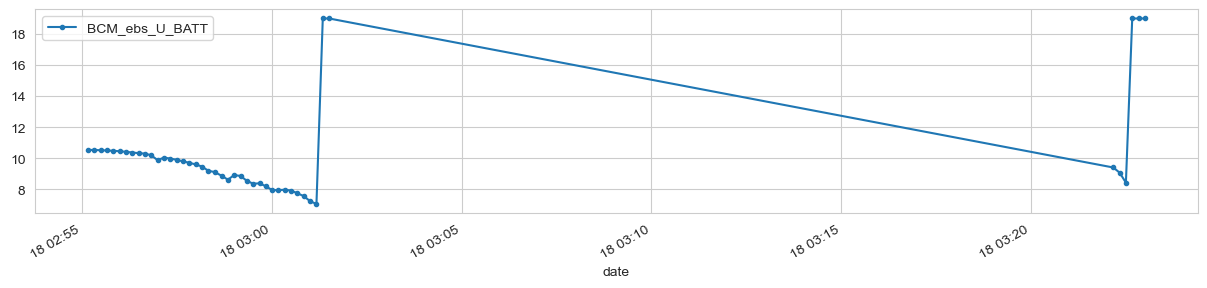

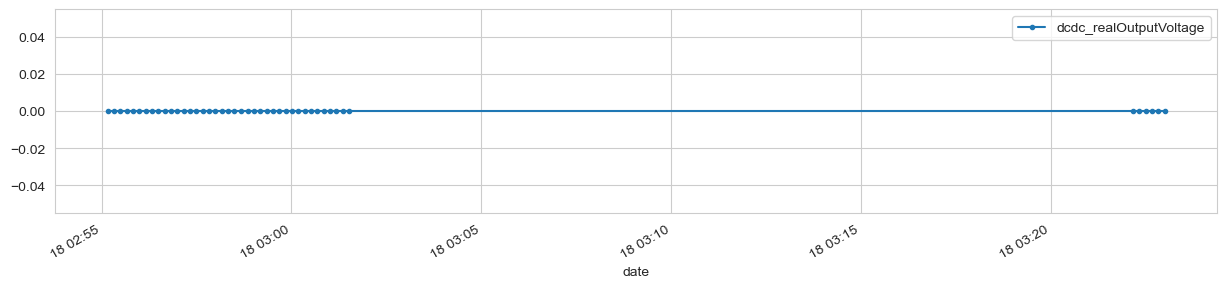

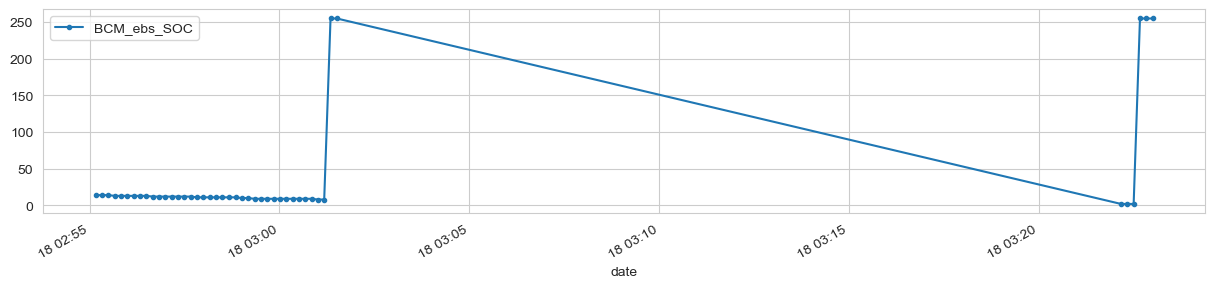

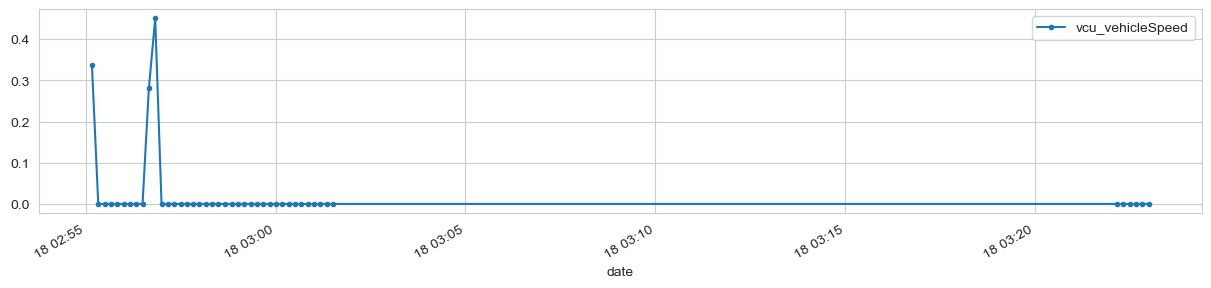

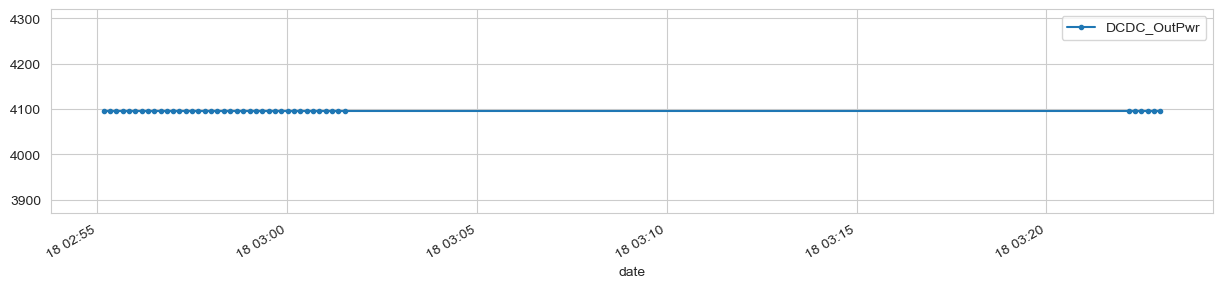

In [19]:
import matplotlib.pyplot as plt

MAS00198_copy["2023-04-18 02:55:00":"2023-04-18 04:01:00"][["BCM_ebs_U_BATT"]].plot(grid=True, marker=".", figsize=(15, 3))

MAS00198_copy["2023-04-18 02:55:00":"2023-04-18 04:01:00"][["dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

MAS00198_copy["2023-04-18 02:55:00":"2023-04-18 04:01:00"][["BCM_ebs_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))

MAS00198_copy["2023-04-18 02:55:00":"2023-04-18 04:01:00"][["vcu_vehicleSpeed"]].plot(grid=True, marker=".", figsize=(15, 3))
MAS00198_copy["2023-04-18 02:55:00":"2023-04-18 04:01:00"][["DCDC_OutPwr"]].plot(grid=True, marker=".", figsize=(15, 3))
# extra code – saves the figure for the book
plt.show()